In [1]:
import numpy as np
import pandas as pd
import qiime2 as q2
from biom import Table
from scipy import stats
from scipy.stats import ttest_ind, spearmanr

# plotting
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline


def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)


# sulfatases

/var/folders/tt/zz8n1d_55_n6r7czk3k1qwcw0000gp/T/ipykernel_74142/1767249229.py:3: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']


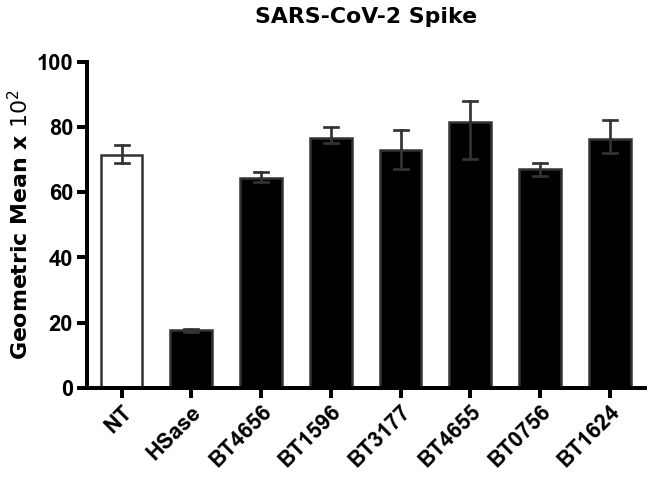

In [2]:

plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22
matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']



fig, ax = plt.subplots(1, 1, figsize=(10, 6),
                        sharey=False,
                        sharex=False)
stats = {}

k_ = ''
final_sulf = pd.read_csv('../data/nissle-enzyme-exp/sulfatase-spike.csv', index_col=0)
df_ = final_sulf.copy()
ymin, ymax = (0, 100)
order_ = ['NT', 'HSase', 'BT4656', 'BT1596', 'BT3177', 'BT4655', 'BT0756', 'BT1624']
clrs = ['white'] + ['black' for x in order_[1:]]
    
    
df_[['spike']] = df_['spike'] // 10**2
sns.barplot(y='spike',
            x='treatment',
            alpha=1,
            order=order_,
            linewidth=2.5,
            capsize=.2,
            errcolor=".2",
            edgecolor=".2",
            data=df_, ax=ax,
            palette=clrs)
change_width(ax, .6)

ax.set_ylim(ymin, ymax)

ax.set_title('SARS-CoV-2 Spike',
             fontsize=22,
             weight='bold', y=1.1)

ax.set_ylabel('Geometric Mean x $10^{2}$',
              weight='bold',
              fontsize=22,
              color='black') 
ax.set_xlabel('')

ax.set_facecolor('white')
ax.set_axisbelow(True)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
      ax.spines[axis].set_linewidth(4)
for child in ax.get_children():
    if isinstance(child, matplotlib.spines.Spine):
        child.set_color('black')
ax.tick_params(axis='y', colors='black', width=4, length=10)
ax.tick_params(axis='x', colors='black', width=4, length=10)
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,
                   weight='bold',
                   horizontalalignment='right',
                   rotation_mode="anchor")
for tick in ax.get_xticklabels():
    tick.set_fontproperties('arial')
    tick.set_ha("right")
    tick.set_weight("bold")
    tick.set_color("black")
    tick.set_fontsize(22)
for tick in ax.get_yticklabels():
    tick.set_fontproperties('arial')
    tick.set_weight("bold")
    tick.set_color("black")
    tick.set_fontsize(22)
   
nc = 'NT'
trts_ = set(df_.treatment) - set([nc])
stats['spike'] = {trt_:ttest_ind(df_[df_.treatment.isin([trt_])]['spike'].values, df_[df_.treatment.isin([nc])]['spike'].values) for trt_ in trts_}
    
# set the backrounf to be transparent
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.0)

plt.savefig('../results/figures/FigS3B.pdf',dpi=1000, 
            bbox_inches='tight',
            facecolor=fig.get_facecolor(), 
            edgecolor='none')

plt.show()

# HS lyases

In [3]:
nissledata_stacked = pd.read_csv('../data/nissle-enzyme-exp/nissledata-stacked.csv', index_col=0)
nissledata = pd.read_csv('../data/nissle-enzyme-exp/nissledata.csv', index_col=0)
hep_compdf = pd.read_csv('../data/nissle-enzyme-exp/hep-compdf.csv', index_col=0)
hep_compdf_stacked = pd.read_csv('../data/nissle-enzyme-exp/hep-compdf-stacked.csv', index_col=0)


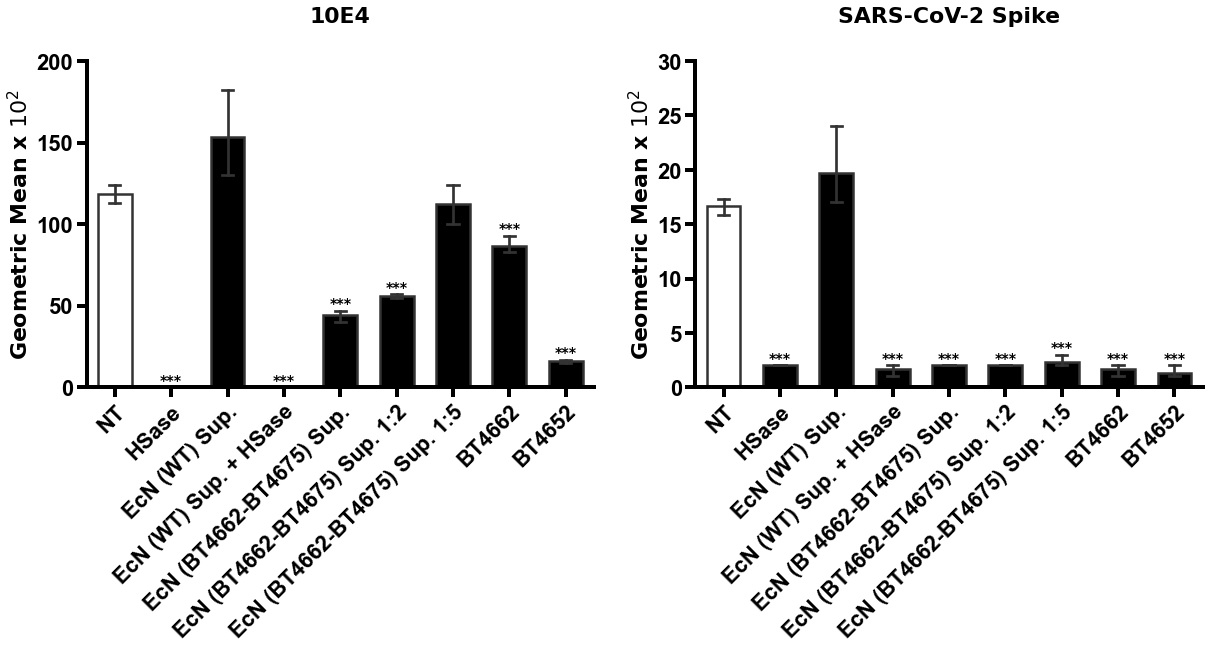

In [4]:
plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22


fig, axn = plt.subplots(1, 2, figsize=(20, 6),
                        sharey=False,
                        sharex=False)

order_ = ['NT','HSase',
         'EcN (WT) Sup.',
         'EcN (WT) Sup. + HSase',
         'EcN (BT4662-BT4675) Sup.',
         'EcN (BT4662-BT4675) Sup. 1:2',
         'EcN (BT4662-BT4675) Sup. 1:5',
         'BT4662', 'BT4652']

#order_ = ['Media','$B.\\,ova.$','$B.\\,thet.$','$F.\\,hep.$',]

clrs = ['white'] + ['black' for x in order_[1:]]
stats = {}

axn = axn.flatten()
for (k_, df, y_), (ymin, ymax), (i_, ax) in zip([('10E4', nissledata, '10E4'),
                                                  ('SARS-CoV-2 Spike', nissledata, 'Spike')],
                                               [(0,200),(0,30)],
                                               enumerate(axn)):
    df_ = df.copy()
    df_[y_] = df_[y_] // 10**2
    g = sns.barplot(y=y_,
                x='treatment',
                alpha=1,
                order=order_,
                linewidth=2.5,
                capsize=.2,
                errcolor=".2",
                edgecolor=".2",
                data=df_, ax=ax,
                palette=clrs)
    change_width(ax, .6)



    ax.set_ylim(ymin, ymax)

    ax.set_title(k_,
                 fontsize=22,
                 weight='bold', y=1.1)

    ax.set_ylabel('Geometric Mean x $10^{2}$',
                  weight='bold',
                  fontsize=22,
                  color='black') 
    ax.set_xlabel('')

    ax.set_facecolor('white')
    ax.set_axisbelow(True)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['top'].set_visible(False)
    for axis in ['bottom','left']:
          ax.spines[axis].set_linewidth(4)
    for child in ax.get_children():
        if isinstance(child, matplotlib.spines.Spine):
            child.set_color('black')
    ax.tick_params(axis='y', colors='black', width=4, length=10)
    ax.tick_params(axis='x', colors='black', width=4, length=10)
    ax.set_xticklabels(ax.get_xticklabels(),
                       rotation=45,
                       weight='bold',
                       horizontalalignment='right',
                       rotation_mode="anchor")
    for tick in ax.get_xticklabels():
        tick.set_fontproperties('arial')
        tick.set_ha("right")
        tick.set_weight("bold")
        tick.set_color("black")
        tick.set_fontsize(22)
    for tick in ax.get_yticklabels():
        tick.set_fontproperties('arial')
        tick.set_weight("bold")
        tick.set_color("black")
        tick.set_fontsize(22)
    
    nc = 'NT'
    trts_ = set(order_) - set([nc])  
    stats_ = {}
    
    for trt_ in trts_:
        df_stat = df_.copy()     
        vtrt = df_stat[df_stat.treatment.isin([trt_])][y_].values
        ncv = df_stat[df_stat.treatment.isin([nc])][y_].values
        t_, p_ = ttest_ind(ncv, vtrt)
        stats_[trt_] = (t_, p_)

        if t_ < 0:
            continue
        # n.s.
        if p_ >= 0.05:
            p_ = ''
        #*P < 0.05;
        elif p_ < 0.05 and p_ > 0.01:
            p_ = '*'
        #**P < 0.001;
        elif p_ < 0.01 and p_ > 0.001:
            p_ = '**'
        #***P < 0.0001
        elif p_ < 0.001:
            p_ = '***'

        x1 = order_.index(trt_)

        y, h, col = np.max(vtrt), .02, 'k'

        ax.text(x1, y+h, p_,
                weight='bold',
                ha='center', va='bottom',
                color=col, fontsize=14)
            
        stats_[trt_] = (t_, p_)
    stats[y_] = stats_

    

# set the backrounf to be transparent
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.0)

plt.savefig('../results/figures/FigS4.pdf',dpi=1000, 
            bbox_inches='tight',
            facecolor=fig.get_facecolor(), 
            edgecolor='none')

plt.show()

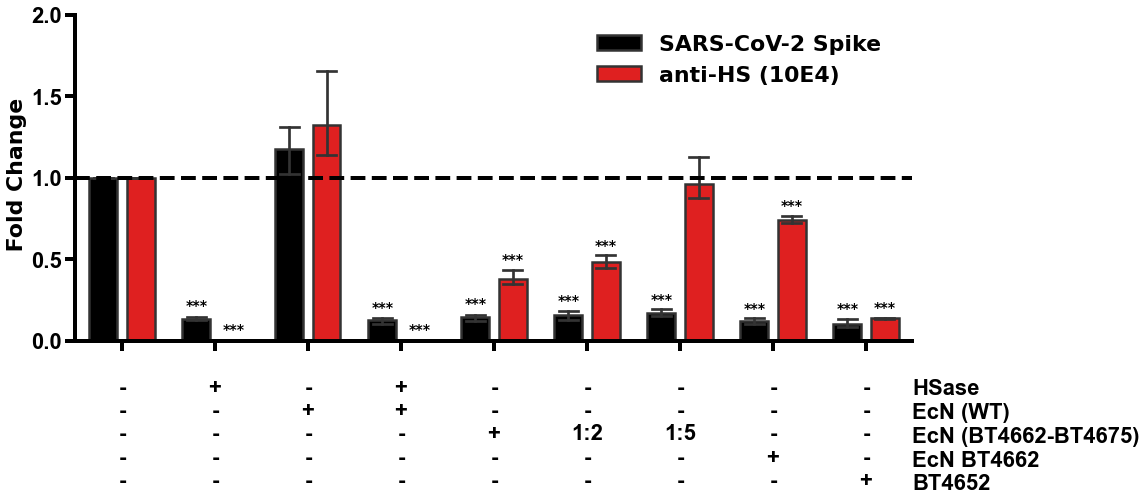

In [5]:
plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22


fig, axn = plt.subplots(1, 1, figsize=(15, 6),
                        sharey=False,
                        sharex=False)


clrs_nissledata = {'SARS-CoV-2 Spike':'black', 'anti-HS (10E4)':'red'}
order_nissledata = ['NT','HSase',
                     'EcN (WT) Sup.',
                     'EcN (WT) Sup. + HSase',
                     'EcN (BT4662-BT4675) Sup.',
                     'EcN (BT4662-BT4675) Sup. 1:2',
                     'EcN (BT4662-BT4675) Sup. 1:5',
                     'BT4662',
                     'BT4652']

# HSase, Heparin, EcN (WT), EcN (BT4662-BT4675), EcN BT4662
map_pls_minus = {'EcN (BT4662-BT4675) Sup.':'\n-\n-\n+\n-\n-',
                 'EcN (BT4662-BT4675) Sup. 1:2':'\n-\n-\n1:2\n-\n-',
                 'EcN (BT4662-BT4675) Sup. 1:5':'\n-\n-\n1:5\n-\n-',
                 'EcN (WT) Sup.':'\n-\n+\n-\n-\n-',
                 'EcN (WT) Sup. + HSase':'\n+\n+\n-\n-\n-',
                 'BT4662':'\n-\n-\n-\n+\n-',
                 'BT4652':'\n-\n-\n-\n-\n+',
                 'HSase':'\n+\n-\n-\n-\n-',
                 'NT':'\n-\n-\n-\n-\n-'}
map_pls_minus_rev = {v:k for k, v in map_pls_minus.items()}

for df_, order_, clrs_stack, (axi, ax) in zip([nissledata_stacked.copy()],
                                                [order_nissledata],
                                                [clrs_nissledata],
                                                enumerate([axn])):

    y_ = 'means'
    df_['treatment'] = df_.treatment.replace(map_pls_minus)
    order_ = [map_pls_minus[o_] for o_ in order_]
    
    

    g = sns.barplot(y=y_,
                    x='treatment',
                    alpha=1,
                    order=order_,
                    hue='measure',
                    linewidth=2.5,
                    capsize=.2,
                    errcolor=".2",
                    edgecolor=".2",
                    data=df_, 
                    ax=ax,
                    palette=clrs_stack)


    #ax.set_yscale('log')
    ax.set_ylim(0, 2)

    change_width(ax, .3)
    ax.axhline(1.0, lw=4, ls='--', color='black')

    ax.set_title('',
                 fontsize=22,
                 weight='bold', y=1.1)

    ax.set_ylabel(' Fold Change',
                  weight='bold',
                  fontsize=22,
                  color='black') 
    ax.set_xlabel('')

    ax.set_facecolor('white')
    ax.set_axisbelow(True)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['top'].set_visible(False)
    for axis in ['bottom','left']:
          ax.spines[axis].set_linewidth(4)
    for child in ax.get_children():
        if isinstance(child, matplotlib.spines.Spine):
            child.set_color('black')
    ax.tick_params(axis='y', colors='black', width=4, length=10)
    ax.tick_params(axis='x', colors='black', width=4, length=10)
    """ax.set_xticklabels(ax.get_xticklabels(),
                       rotation=0,
                       weight='bold',
                       horizontalalignment='right',
                       rotation_mode="anchor")"""
    for tick in ax.get_xticklabels():
        tick.set_fontproperties('arial')
        #tick.set_ha("right")
        tick.set_weight("bold")
        tick.set_color("black")
        tick.set_fontsize(22)
    for tick in ax.get_yticklabels():
        tick.set_fontproperties('arial')
        tick.set_weight("bold")
        tick.set_color("black")
        tick.set_fontsize(22)

    # generate legend from last iterations    
    if axi == 0:
        
        handles, labels = ax.get_legend_handles_labels()
        legend = ax.legend(handles[:], labels[:], loc=2, 
                                 bbox_to_anchor=(0.6, 1.0),
                                 prop={'size':22, 'weight':'bold'},
                                 fancybox=False, framealpha=.0,
                                 ncol=1, markerscale=.5)
    else:
        ax.legend_.remove()

    
    stats = {}    
    for measure_, x_adj in zip(['SARS-CoV-2 Spike','anti-HS (10E4)'], [-.2,.2]):

        nc = map_pls_minus['NT']
        df_stat = df_[df_.measure == measure_]
        trts_ = set(order_) - set([nc])  
        stats_ = {}

        for trt_ in trts_:
            
            vtrt = df_stat[df_stat.treatment.isin([trt_])][y_].values
            ncv = df_stat[df_stat.treatment.isin([nc])][y_].values
            t_, p_ = ttest_ind(vtrt, ncv)
            stats_[map_pls_minus_rev[trt_]] = (t_, p_)
            
            if t_ > 0:
                continue
            # n.s.
            if p_ >= 0.05:
                p_ = ''
            #*P < 0.05;
            elif p_ < 0.05 and p_ > 0.01:
                p_ = '*'
            #**P < 0.001;
            elif p_ < 0.01 and p_ > 0.001:
                p_ = '**'
            #***P < 0.0001
            elif p_ < 0.001:
                p_ = '***'
                
            x1 = order_.index(trt_)

            y, h, col = np.max(vtrt), .02, 'k'
            
            ax.text(x1+x_adj, y+h, p_,
                    weight='bold',
                    ha='center', va='bottom',
                    color=col, fontsize=14)
            
        stats[measure_] = stats_

val_ = 0.0
for yv_ in ['HSase', 'EcN (WT)', 'EcN (BT4662-BT4675)', 'EcN BT4662', 'BT4652']:
    plt.figtext(0.9, val_, yv_, fontproperties='arial', weight='extra bold', fontsize=22, horizontalalignment='left')
    val_ -= 0.055

# set the backrounf to be transparent
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.0)

fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)


plt.savefig('../results/figures/Fig4B.pdf',dpi=1000, 
            bbox_inches='tight',
            facecolor=fig.get_facecolor(), 
            edgecolor='none')

plt.show()

In [6]:
stats['SARS-CoV-2 Spike']



{'EcN (BT4662-BT4675) Sup. 1:2': (-76.13478843992043, 1.7744447510783624e-11),
 'EcN (WT) Sup. + HSase': (-126.4401313229656, 5.10492258837891e-13),
 'BT4662': (-123.28312804406328, 6.092948943607903e-13),
 'BT4652': (-87.67448127957701, 6.613523479848586e-12),
 'HSase': (-150.62617884508728, 4.085252015077486e-18),
 'EcN (WT) Sup.': (3.1741268333619, 0.015617821948969116),
 'EcN (BT4662-BT4675) Sup. 1:5': (-104.04062358099823, 1.9974738050040862e-12),
 'EcN (BT4662-BT4675) Sup.': (-91.3925032555457, 4.946173155741458e-12)}

In [7]:
stats['anti-HS (10E4)']

{'EcN (BT4662-BT4675) Sup. 1:2': (-34.19281082232925, 4.744228398550158e-09),
 'EcN (WT) Sup. + HSase': (-7029.684848356069, 3.1133218697286662e-25),
 'BT4662': (-29.627618421919344, 1.285775644824247e-08),
 'BT4652': (-535.745818736356, 2.084638326527873e-17),
 'HSase': (-1136.1187626763815, 6.868277623393267e-27),
 'EcN (WT) Sup.': (2.964144420641967, 0.020981297284710917),
 'EcN (BT4662-BT4675) Sup. 1:5': (-0.7003471084628031, 0.5063136814966702),
 'EcN (BT4662-BT4675) Sup.': (-34.69087281398213, 4.289749384111799e-09)}

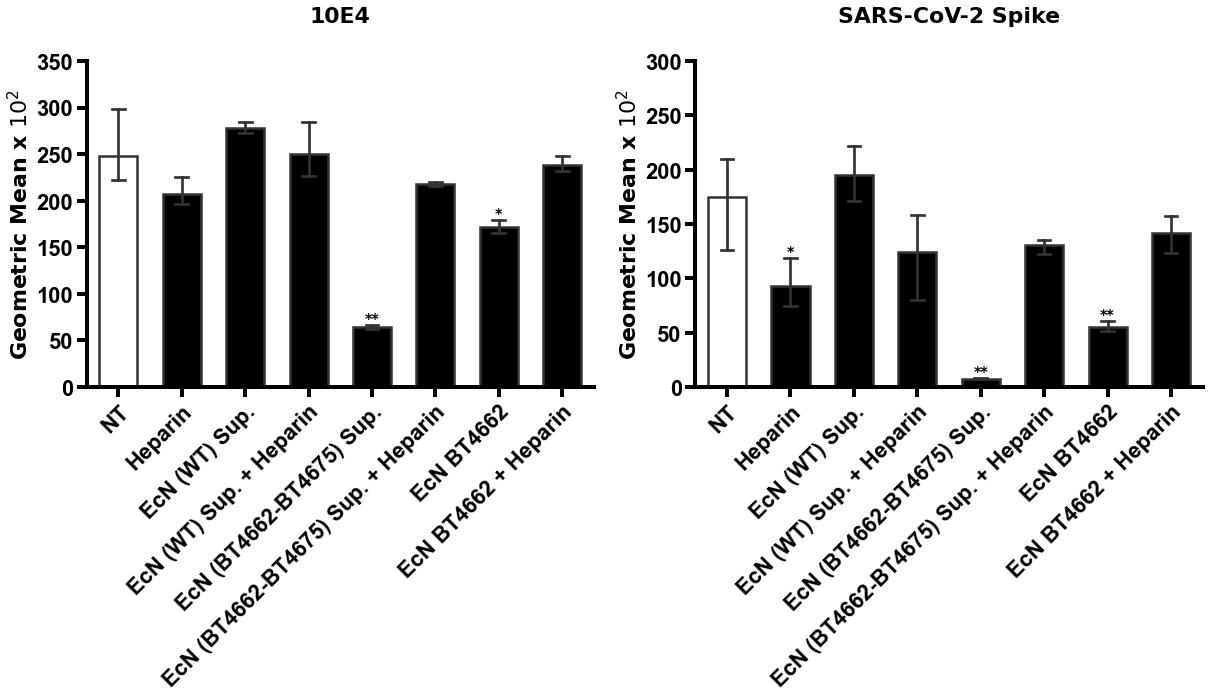

In [8]:
plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22


fig, axn = plt.subplots(1, 2, figsize=(20, 6),
                        sharey=False,
                        sharex=False)

order_ = ['NT','Heparin',
             'EcN (WT) Sup.',
             'EcN (WT) Sup. + Heparin',
             'EcN (BT4662-BT4675) Sup.',
             'EcN (BT4662-BT4675) Sup. + Heparin',
             'EcN BT4662',
             'EcN BT4662 + Heparin']

#order_ = ['Media','$B.\\,ova.$','$B.\\,thet.$','$F.\\,hep.$',]

clrs = ['white'] + ['black' for x in order_[1:]]
stats = {}

axn = axn.flatten()
for (k_, df, y_), (ymin, ymax), (i_, ax) in zip([('10E4', hep_compdf, '10E4'),
                                                  ('SARS-CoV-2 Spike', hep_compdf, 'Spike')],
                                               [(0,350),(0,300)],
                                               enumerate(axn)):
    df_ = df.copy()
    df_[y_] = df_[y_] // 10**2
    g = sns.barplot(y=y_,
                x='treatment',
                alpha=1,
                order=order_,
                linewidth=2.5,
                capsize=.2,
                errcolor=".2",
                edgecolor=".2",
                data=df_, ax=ax,
                palette=clrs)
    change_width(ax, .6)



    ax.set_ylim(ymin, ymax)

    ax.set_title(k_,
                 fontsize=22,
                 weight='bold', y=1.1)

    ax.set_ylabel('Geometric Mean x $10^{2}$',
                  weight='bold',
                  fontsize=22,
                  color='black') 
    ax.set_xlabel('')

    ax.set_facecolor('white')
    ax.set_axisbelow(True)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['top'].set_visible(False)
    for axis in ['bottom','left']:
          ax.spines[axis].set_linewidth(4)
    for child in ax.get_children():
        if isinstance(child, matplotlib.spines.Spine):
            child.set_color('black')
    ax.tick_params(axis='y', colors='black', width=4, length=10)
    ax.tick_params(axis='x', colors='black', width=4, length=10)
    ax.set_xticklabels(ax.get_xticklabels(),
                       rotation=45,
                       weight='bold',
                       horizontalalignment='right',
                       rotation_mode="anchor")
    for tick in ax.get_xticklabels():
        tick.set_fontproperties('arial')
        tick.set_ha("right")
        tick.set_weight("bold")
        tick.set_color("black")
        tick.set_fontsize(22)
    for tick in ax.get_yticklabels():
        tick.set_fontproperties('arial')
        tick.set_weight("bold")
        tick.set_color("black")
        tick.set_fontsize(22)
    
    nc = 'NT'
    trts_ = set(order_) - set([nc])  
    stats_ = {}
    
    for trt_ in trts_:
        #t_, p_ = ttest_ind(df_[df_.treatment.isin([trt_])][y_].values, df_[df_.treatment.isin([nc])][y_].values)
        df_stat = df_.copy()     
        vtrt = df_stat[df_stat.treatment.isin([trt_])][y_].values
        ncv = df_stat[df_stat.treatment.isin([nc])][y_].values
        t_, p_ = ttest_ind(ncv, vtrt)
        stats_[trt_] = (t_, p_)

        if t_ < 0:
            continue
        # n.s.
        if p_ >= 0.05:
            p_ = ''
        #*P < 0.05;
        elif p_ < 0.05 and p_ > 0.01:
            p_ = '*'
        #**P < 0.001;
        elif p_ < 0.01 and p_ > 0.001:
            p_ = '**'
        #***P < 0.0001
        elif p_ < 0.001:
            p_ = '***'

        x1 = order_.index(trt_)

        y, h, col = np.max(vtrt), .02, 'k'

        ax.text(x1, y+h, p_,
                weight='bold',
                ha='center', va='bottom',
                color=col, fontsize=14)
            
        stats_[trt_] = (t_, p_)
        
        
    stats[y_] = stats_

    

# set the backrounf to be transparent
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.0)

plt.savefig('../results/figures/FigS2-notused.pdf',dpi=1000, 
            bbox_inches='tight',
            facecolor=fig.get_facecolor(), 
            edgecolor='none')

plt.show()

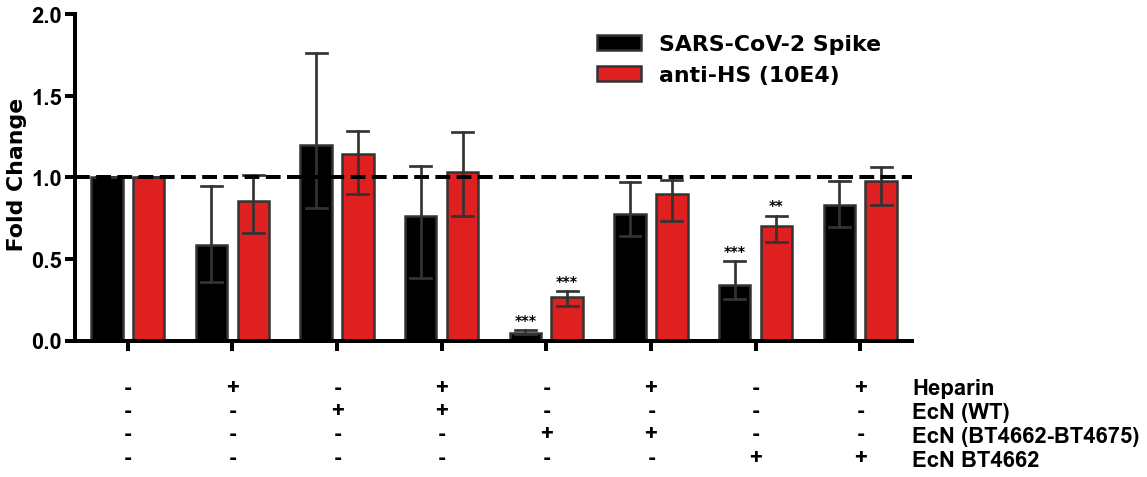

In [9]:
plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22


fig, axn = plt.subplots(1, 1, figsize=(15, 6),
                        sharey=False,
                        sharex=False)


clrs_hep = {'SARS-CoV-2 Spike':'black', 'anti-HS (10E4)':'red'}
order_hep = ['NT','Heparin',
             'EcN (WT) Sup.',
             'EcN (WT) Sup. + Heparin',
             'EcN (BT4662-BT4675) Sup.',
             'EcN (BT4662-BT4675) Sup. + Heparin',
             'EcN BT4662',
             'EcN BT4662 + Heparin']

# HSase, Heparin, EcN (WT), EcN (BT4662-BT4675), EcN BT4662
map_pls_minus = {'EcN (BT4662-BT4675) Sup.':'\n-\n-\n+\n-',
                 'EcN (BT4662-BT4675) Sup. + Heparin':'\n+\n-\n+\n-',
                 'EcN (BT4662-BT4675) Sup. 1:2':'\n-\n-\n1:2\n-',
                 'EcN (BT4662-BT4675) Sup. 1:5':'\n-\n-\n1:5\n-',
                 'EcN (WT) Sup.':'\n-\n+\n-\n-',
                 'EcN (WT) Sup. + Heparin':'\n+\n+\n-\n-',
                 'EcN BT4662':'\n-\n-\n-\n+',
                 'EcN BT4662 + Heparin':'\n+\n-\n-\n+',
                 'Heparin':'\n+\n-\n-\n-',
                 'NT':'\n-\n-\n-\n-'}
map_pls_minus_rev = {v:k for k, v in map_pls_minus.items()}

for df_, order_, clrs_stack, (axi, ax) in zip([hep_compdf_stacked.copy()],
                                                [order_hep],
                                                [clrs_hep],
                                                enumerate([axn])):

    y_ = 'means'
    df_['treatment'] = df_.treatment.replace(map_pls_minus)
    order_ = [map_pls_minus[o_] for o_ in order_]
    

    g = sns.barplot(y=y_,
                    x='treatment',
                    alpha=1,
                    order=order_,
                    hue='measure',
                    linewidth=2.5,
                    capsize=.2,
                    errcolor=".2",
                    edgecolor=".2",
                    data=df_, 
                    ax=ax,
                    palette=clrs_stack)


    #ax.set_yscale('log')
    ax.set_ylim(0, 2)

    change_width(ax, .3)
    ax.axhline(1.0, lw=4, ls='--', color='black')

    ax.set_title('',
                 fontsize=22,
                 weight='bold', y=1.1)

    ax.set_ylabel(' Fold Change',
                  weight='bold',
                  fontsize=22,
                  color='black') 
    ax.set_xlabel('')

    ax.set_facecolor('white')
    ax.set_axisbelow(True)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['top'].set_visible(False)
    for axis in ['bottom','left']:
          ax.spines[axis].set_linewidth(4)
    for child in ax.get_children():
        if isinstance(child, matplotlib.spines.Spine):
            child.set_color('black')
    ax.tick_params(axis='y', colors='black', width=4, length=10)
    ax.tick_params(axis='x', colors='black', width=4, length=10)
    """ax.set_xticklabels(ax.get_xticklabels(),
                       rotation=0,
                       weight='bold',
                       horizontalalignment='right',
                       rotation_mode="anchor")"""
    for tick in ax.get_xticklabels():
        tick.set_fontproperties('arial')
        #tick.set_ha("right")
        tick.set_weight("bold")
        tick.set_color("black")
        tick.set_fontsize(22)
    for tick in ax.get_yticklabels():
        tick.set_fontproperties('arial')
        tick.set_weight("bold")
        tick.set_color("black")
        tick.set_fontsize(22)

    # generate legend from last iterations    
    if axi == 0:
        
        handles, labels = ax.get_legend_handles_labels()
        legend = ax.legend(handles[:], labels[:], loc=2, 
                                 bbox_to_anchor=(0.60, 1.0),
                                 prop={'size':22, 'weight':'bold'},
                                 fancybox=False, framealpha=.0,
                                 ncol=1, markerscale=.5)
    else:
        ax.legend_.remove()

    
    stats = {}    
    for measure_, x_adj in zip(['SARS-CoV-2 Spike','anti-HS (10E4)'], [-.2,.2]):

        nc = map_pls_minus['NT']
        df_stat = df_[df_.measure == measure_]
        trts_ = set(order_) - set([nc])  
        stats_ = {}

        for trt_ in trts_:
            
            vtrt = df_stat[df_stat.treatment.isin([trt_])][y_].values
            ncv = df_stat[df_stat.treatment.isin([nc])][y_].values
            t_, p_ = ttest_ind(ncv, vtrt)
            stats_[map_pls_minus_rev[trt_]] = (t_, p_)
            
            if t_ < 0:
                continue
            # n.s.
            if p_ >= 0.05:
                p_ = ''
            #*P < 0.05;
            elif p_ < 0.05 and p_ > 0.01:
                p_ = '*'
            #**P < 0.001;
            elif p_ < 0.01 and p_ > 0.001:
                p_ = '**'
            #***P < 0.0001
            elif p_ < 0.001:
                p_ = '***'
                
            x1 = order_.index(trt_)

            y, h, col = np.max(vtrt), .02, 'k'
            
            ax.text(x1+x_adj, y+h, p_,
                    weight='bold',
                    ha='center', va='bottom',
                    color=col, fontsize=14)
            
        stats[measure_] = stats_

val_ = 0.0
for yv_ in ['Heparin', 'EcN (WT)', 'EcN (BT4662-BT4675)', 'EcN BT4662']:
    plt.figtext(0.9, val_, yv_, fontproperties='arial', weight='extra bold', fontsize=22, horizontalalignment='left')
    val_ -= 0.055
#plt.figtext(0.12, -0.05, 'Heparin', fontproperties='arial', weight='extra bold', fontsize=22, horizontalalignment='right')


# set the backrounf to be transparent
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.0)

#fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)


plt.savefig('../results/figures/Fig4C.pdf',dpi=1000, 
            bbox_inches='tight',
            facecolor=fig.get_facecolor(), 
            edgecolor='none')


In [10]:
stats

{'SARS-CoV-2 Spike': {'EcN (BT4662-BT4675) Sup.': (124.57437899623858,
   2.490289185223415e-08),
  'EcN (BT4662-BT4675) Sup. + Heparin': (2.257026054748639,
   0.08696611302635489),
  'EcN BT4662 + Heparin': (2.0126956176356092, 0.11444659202824566),
  'EcN (WT) Sup.': (-0.6793643374939979, 0.534186663163684),
  'EcN (WT) Sup. + Heparin': (1.1783455956779598, 0.3039711637168847),
  'EcN BT4662': (9.065499862488766, 0.0008206365472827822),
  'Heparin': (2.2819704927285693, 0.08460249950838383)},
 'anti-HS (10E4)': {'EcN (BT4662-BT4675) Sup.': (27.138313752581034,
   1.096222693809025e-05),
  'EcN (BT4662-BT4675) Sup. + Heparin': (1.2602807575427697,
   0.2760779943619574),
  'EcN BT4662 + Heparin': (0.3027882653092532, 0.7771443931951849),
  'EcN (WT) Sup.': (-1.1634147520630933, 0.30933121161858507),
  'EcN (WT) Sup. + Heparin': (-0.23244658224349704, 0.827600036047293),
  'EcN BT4662': (5.775276745746048, 0.004463579373443618),
  'Heparin': (1.3707680284619637, 0.2423308596713391)}}

## Live virus experiment


In [18]:
relative_infection = pd.read_excel('../data/nissle-enzyme-exp/live-virus-experiments.xlsx', sheet_name='relative-infection')
relative_infection.loc[relative_infection.relative_infection > 100, 'relative_infection'] = 100
relative_infection.head(4)


,relative_infection,treatment,replicate,experiment,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,100.000000,Untreated,1,1,NaN,NaN,NaN
1,46.352533,BT4652 (250µg/ml),1,1,NaN,NaN,NaN
2,46.249908,BT4652 (100µg/ml),1,1,NaN,NaN,NaN
3,49.104314,BT4652 (50µg/ml),1,1,NaN,NaN,NaN


In [19]:
percent_infection = pd.read_excel('../data/nissle-enzyme-exp/live-virus-experiments.xlsx', sheet_name='percent-infection')
percent_infection.head(4)


,treatment,percent_infection,treatment_type,infection,replicate,experiment,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,Matched DPBS control,17.04995,Untreated,infected,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Matched DPBS control,16.30771,Untreated,infected,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Matched DPBS control,19.57254,Untreated,infected,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Enzyme,17.76534,Untreated,infected,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/Users/cmartino/miniconda3/envs/qiime2-2021.11/lib/python3.8/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level


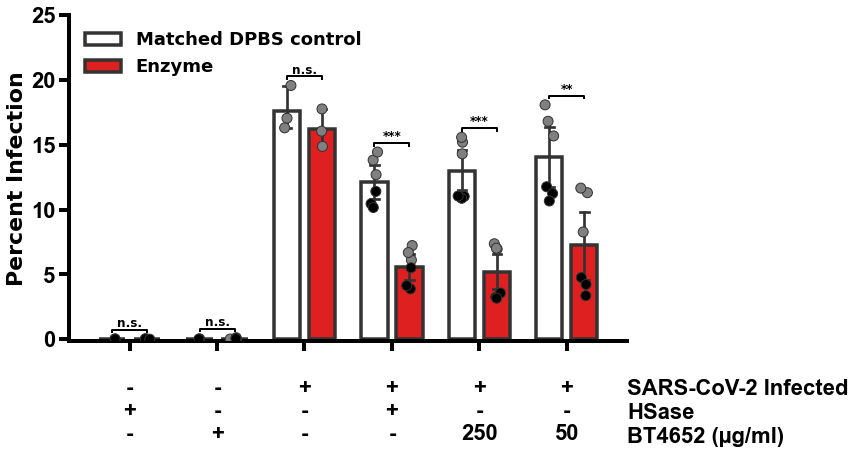

In [20]:
plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22
plt.rcParams.update({'hatch.color': 'k'})

from matplotlib.patches import Polygon, Patch


fig, axn = plt.subplots(1, 1, figsize=(10, 6),
                        sharey=False,
                        sharex=False)

clrs_nissledata = {'Matched DPBS control':'white',
                   'Enzyme':'red'}
hue_order_ = ['Matched DPBS control', 'Enzyme']

order_nissledata = ['HSase-uninfected',
                     'BT4652 (250µg/ml)-uninfected',
                    'Untreated-infected',
                    'HSase-infected',
                    'BT4652 (250µg/ml)-infected',
                     'BT4652 (50µg/ml)-infected']

# HSase, Heparin, EcN (WT), EcN (BT4662-BT4675), EcN BT4662
# infection \n HSase \n BT4652
map_pls_minus = {'HSase-uninfected':'\n-\n+\n-',
                 'BT4652 (250µg/ml)-uninfected':'\n-\n-\n+',
                 'Untreated-infected':'\n+\n-\n-',
                 'HSase-infected':'\n+\n+\n-',
                 'BT4652 (250µg/ml)-infected':'\n+\n-\n250',
                 'BT4652 (50µg/ml)-infected':'\n+\n-\n50'}

map_pls_minus_rev = {v:k for k, v in map_pls_minus.items()}

for df_, order_, clrs_stack, (axi, ax) in zip([percent_infection.copy()],
                                                [order_nissledata],
                                                [clrs_nissledata],
                                                enumerate([axn])):

    y_ = 'percent_infection'
    x_ = 'combined_trt'
    hue_ = 'treatment'
    #df_['experiment-trt'] = df_['experiment'].astype(str) + ' ' + df_['treatment']
    df_['combined_trt'] = df_.treatment_type + '-' + df_.infection

    df_[x_] = df_[x_].replace(map_pls_minus)
    order_ = [map_pls_minus[o_] for o_ in order_]

    
    exp_tmp = {1:'grey', 2:'black'}
    for sub_, df_sub_ in df_.groupby('experiment'):
        c_sub = exp_tmp[sub_]
        g = sns.stripplot(y=y_,
                          x=x_,
                          alpha=1,
                          order=order_,
                          hue=hue_,
                          s=10,
                          dodge=True,
                          linewidth=1,
                          edgecolor=".2",
                          hue_order=hue_order_,
                          data=df_sub_, 
                          ax=ax,
                          palette=[c_sub] * 2,)
    
    g = sns.barplot(y=y_,
                    x=x_,
                    alpha=1,
                    order=order_,
                    hue=hue_,
                    linewidth=3.5,
                    capsize=.1,
                    errcolor=".2",
                    edgecolor=".2",
                    hue_order=hue_order_,
                    data=df_, 
                    ax=ax,
                    palette=clrs_stack)

    #num_locations = len(mdf.Location.unique())
    """x_ticks_ = sorted([round(bar.get_x(), 2) for bar in ax.patches])
    hatches = ['///','/'] * (len(x_ticks_) // 2 + 1)
    hatches = {round(k,2):v for k, v in zip(x_ticks_, hatches)}
    for bar in ax.patches:
        bar.set_hatch(hatches[round(bar.get_x(), 2)])"""
      
    #ax.set_yscale('log')
    ax.set_ylim(-0.15, 25)
    #ax.axhline(1.0, lw=4, ls='--', color='black')

    change_width(ax, .3)

    ax.set_title('',
                 fontsize=22,
                 weight='bold', y=1.1)

    ax.set_ylabel('Percent Infection',
                  weight='bold',
                  fontsize=22,
                  color='black') 
    ax.set_xlabel('')

    ax.set_facecolor('white')
    ax.set_axisbelow(True)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['top'].set_visible(False)
    for axis in ['bottom','left']:
          ax.spines[axis].set_linewidth(4)
    for child in ax.get_children():
        if isinstance(child, matplotlib.spines.Spine):
            child.set_color('black')
    ax.tick_params(axis='y', colors='black', width=4, length=10)
    ax.tick_params(axis='x', colors='black', width=4, length=10)
    """ax.set_xticklabels(ax.get_xticklabels(),
                       rotation=0,
                       weight='bold',
                       horizontalalignment='right',
                       rotation_mode="anchor")"""
    for tick in ax.get_xticklabels():
        tick.set_fontproperties('arial')
        #tick.set_ha("right")
        tick.set_weight("bold")
        tick.set_color("black")
        tick.set_fontsize(22)
    for tick in ax.get_yticklabels():
        tick.set_fontproperties('arial')
        tick.set_weight("bold")
        tick.set_color("black")
        tick.set_fontsize(22)

    

    ttest_stat = {}
    for x_i in order_:
        df_sub = df_[df_[x_] == x_i]
        df_sub_vals = [df_tmp[y_].values for _, df_tmp in df_sub.groupby(hue_)]
        if len(df_sub_vals) != 2:
            continue
        t_, p_ = ttest_ind(df_sub_vals[0], df_sub_vals[1])
        x1 = order_.index(x_i) - .2
        x2 = order_.index(x_i) + .2
        y_t = np.max([np.max(n) for n in df_sub_vals]) + 0.5
        ttest_stat[map_pls_minus_rev[x_i]] = [t_, p_] 


        if p_ >= 0.05:
            p_ = 'n.s.'
        #*P < 0.05;
        elif p_ < 0.05 and p_ > 0.01:
            p_ = '*'
        #**P < 0.001;
        elif p_ < 0.01 and p_ > 0.001:
            p_ = '**'
        #***P < 0.0001
        elif p_ < 0.001:
            p_ = '***'   

        h, col = .2, 'k'
        ax.plot([x1, x1, x2, x2], [y_t, y_t+h, y_t+h, y_t], lw=2, c=col)
        ax.text((x1+x2)*.5, y_t+h, p_, ha='center', fontsize=12, weight='bold', va='bottom', color=col)


val_ = 0.0
for yv_ in ['SARS-CoV-2 Infected', 'HSase', 'BT4652 (µg/ml)']:
    plt.figtext(0.9, val_, yv_, fontproperties='arial', weight='extra bold', fontsize=22, horizontalalignment='left')
    val_ -= 0.055
#plt.figtext(0.12, -0.05, 'Heparin', fontproperties='arial', weight='extra bold', fontsize=22, horizontalalignment='right')


# set the backrounf to be transparent
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.0)

fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles[4:], labels[4:], loc=2, 
                         bbox_to_anchor=(0.0, 1.0),
                         prop={'size':18, 'weight':'bold'},
                         fancybox=False, framealpha=.0,
                         ncol=1, markerscale=.5)

plt.savefig('../results/figures/Fig4D.pdf',dpi=1000, 
            bbox_inches='tight',
            facecolor=fig.get_facecolor(), 
            edgecolor='none')

plt.show()


In [21]:
ttest_stat = pd.DataFrame(ttest_stat, ['t','P']).T
ttest_stat['P'] = ttest_stat['P'].apply(lambda x: '%.3E' % x)
ttest_stat

,t,P
HSase-uninfected,-0.157099,8.828E-01
BT4652 (250µg/ml)-uninfected,0.827775,4.543E-01
Untreated-infected,-1.089137,3.373E-01
HSase-infected,-7.205256,2.908E-05
BT4652 (250µg/ml)-infected,-6.203399,1.010E-04
BT4652 (50µg/ml)-infected,-3.409697,6.662E-03


In [22]:
cntrl_df = percent_infection[(percent_infection.treatment == 'Matched DPBS control') & (percent_infection.infection == 'infected')].groupby('treatment_type').mean()[['percent_infection']]
trt_df = percent_infection[(percent_infection.treatment == 'Enzyme') & (percent_infection.infection == 'infected')].groupby('treatment_type').mean()[['percent_infection']].reindex(cntrl_df.index)
cntrl_df / trt_df


,percent_infection
treatment_type,
BT4652 (100µg/ml),2.286645
BT4652 (20µg/ml),1.762836
BT4652 (250µg/ml),2.489273
BT4652 (50µg/ml),1.932075
HSase,2.172956
Untreated,1.086930


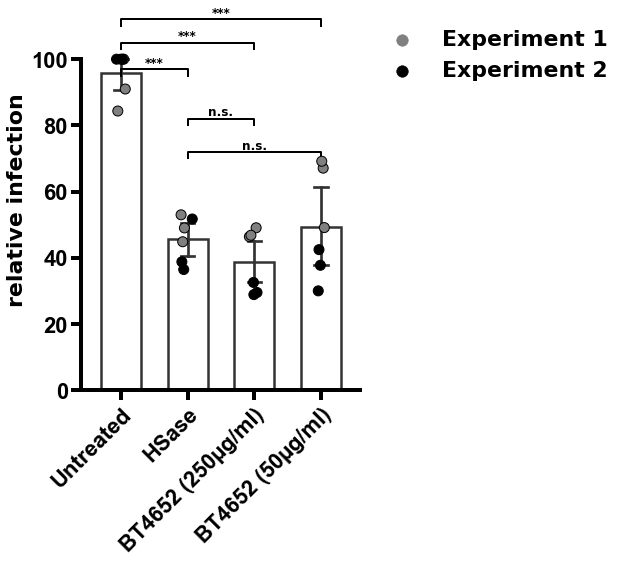

In [23]:
plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22


fig, axn = plt.subplots(1, 1, figsize=(5, 7),
                        sharey=False,
                        sharex=False)


clrs_nissledata = {'Experiment 1':'grey',
                   'Experiment 2':'black'}

order_nissledata = ['Untreated', 'HSase', 'BT4652 (250µg/ml)', 'BT4652 (50µg/ml)']

map_pls_minus_rev = {v:k for k, v in map_pls_minus.items()}

for df_, order_, clrs_stack, (axi, ax) in zip([relative_infection.copy()],
                                                [order_nissledata],
                                                [clrs_nissledata],
                                                enumerate([axn])):

    y_ = 'relative_infection'
    x_ = 'treatment'
    hue_ = 'experiment'
    df_['experiment'] = df_['experiment'].replace({1:'Experiment 1', 2:'Experiment 2'})

    #df_[x_] = df_[x_].replace(map_pls_minus)
    #order_ = [map_pls_minus[o_] for o_ in order_]

    
    g = sns.stripplot(y=y_,
                    x=x_,
                    alpha=1,
                    order=order_,
                    hue=hue_,
                    linewidth=1,
                      s=10,
                    data=df_, 
                    ax=ax,
                    palette=clrs_nissledata)
    
    g = sns.barplot(y=y_,
                    x=x_,
                    alpha=1,
                    order=order_,
                    #hue=hue_,
                    linewidth=2.5,
                    capsize=.2,
                    errcolor=".2",
                    edgecolor=".2",
                    data=df_, 
                    ax=ax,
                    color='white')
    

    #ax.set_yscale('log')
    ax.set_ylim(0, 115)
    ax.spines['left'].set_bounds(0, 100)
    
    #ax.axhline(1.0, lw=4, ls='--', color='black')

    change_width(ax, .6)

    ax.set_title('',
                 fontsize=22,
                 weight='bold', y=1.1)

    ax.set_ylabel('relative infection',
                  weight='bold',
                  fontsize=22,
                  color='black') 
    ax.set_xlabel('')

    ax.set_facecolor('white')
    ax.set_axisbelow(True)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['top'].set_visible(False)
    for axis in ['bottom','left']:
          ax.spines[axis].set_linewidth(4)
    for child in ax.get_children():
        if isinstance(child, matplotlib.spines.Spine):
            child.set_color('black')
    ax.tick_params(axis='y', colors='black', width=4, length=10)
    ax.tick_params(axis='x', colors='black', width=4, length=10)
    ax.set_xticklabels(ax.get_xticklabels(),
                       rotation=45,
                       weight='bold',
                       horizontalalignment='right',
                       rotation_mode="anchor")
    for tick in ax.get_xticklabels():
        tick.set_fontproperties('arial')
        #tick.set_ha("right")
        tick.set_weight("bold")
        tick.set_color("black")
        tick.set_fontsize(22)
    for tick in ax.get_yticklabels():
        tick.set_fontproperties('arial')
        tick.set_weight("bold")
        tick.set_color("black")
        tick.set_fontsize(22)

    # generate legend from last iterations    
    if axi == 0:
        
        handles, labels = ax.get_legend_handles_labels()
        legend = ax.legend(handles[:], labels[:], loc=2, 
                                 bbox_to_anchor=(1.0, 1.0),
                                 prop={'size':22, 'weight':'bold'},
                                 fancybox=False, framealpha=.0,
                                 ncol=1, markerscale=1.5)
    else:
        ax.legend_.remove()
        
        
    #import itertools
    #df_ = df_[df_[x_].isin(order_)]
    #combinations_ = list(itertools.combinations(set(df_[x_]), 2))
    combinations_ = [('Untreated','BT4652 (50µg/ml)'),
                     ('Untreated','BT4652 (250µg/ml)'),
                     ('Untreated','HSase'),
                     ('HSase','BT4652 (50µg/ml)'),
                     ('HSase','BT4652 (250µg/ml)')]
    combinations_y = [110, 110 - (110-95)//2, 95, 70, 80]
    combinations_t_ = {(g1, g2):ttest_ind(df_[df_[x_] == g1][y_], 
                                          df_[df_[x_] == g2][y_])
                       for g1, g2 in combinations_}
    combinations_t_ = pd.DataFrame(combinations_t_, ['t','p']).T
    combinations_t_['p'] *= combinations_t_.shape[0]

    for y_t, comb_ in zip(combinations_y, combinations_):

        x1 = order_.index(comb_[0])
        x2 = order_.index(comb_[1])
        p_ = combinations_t_.loc[(comb_), 'p']


        if p_ >= 0.05:
            p_ = 'n.s.'
        #*P < 0.05;
        elif p_ < 0.05 and p_ > 0.01:
            p_ = '*'
        #**P < 0.001;
        elif p_ < 0.01 and p_ > 0.001:
            p_ = '**'
        #***P < 0.0001
        elif p_ < 0.001:
            p_ = '***'   


        h, col = 2, 'k'
        ax.plot([x1, x1, x2, x2], [y_t, y_t+h, y_t+h, y_t], lw=2, c=col)
        ax.text((x1+x2)*.5, y_t+h, p_, ha='center', fontsize=12, weight='bold', va='bottom', color=col)

# set the backrounf to be transparent
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.0)

fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)


plt.savefig('../results/figures/Fig4E.pdf',dpi=1000, 
            bbox_inches='tight',
            facecolor=fig.get_facecolor(), 
            edgecolor='none')

plt.show()

In [24]:
combinations_t_

t             p
Untreated BT4652 (50µg/ml)    6.619625  2.965219e-04
          BT4652 (250µg/ml)  12.018967  1.439167e-06
          HSase              12.843491  7.692095e-07
HSase     BT4652 (50µg/ml)   -0.513554  3.093593e+00
          BT4652 (250µg/ml)   1.417146  9.341717e-01

In [25]:
cnrtl_mean = relative_infection[relative_infection.treatment == 'Untreated'].mean()['relative_infection']
trt_mean = relative_infection[relative_infection.treatment != 'Untreated'].groupby('treatment').mean()[['relative_infection']]
cnrtl_mean / trt_mean


,relative_infection
treatment,
BT4652 (100µg/ml),2.280739
BT4652 (20µg/ml),1.768091
BT4652 (250µg/ml),2.468555
BT4652 (50µg/ml),1.947160
HSase,2.102100
